4-2 단어 빈도를 이용한 벡터화 (1) Bag of Words <br>
4-3 단어 빈도를 이용한 벡터화 (2) Bag of Words 구현해보기 <br>
4-4 단어 빈도를 이용한 벡터화 (3) DTM과 코사인 유사도 <br>
4-5 단어 빈도를 이용한 벡터화 (4) DTM의 구현과 한계점 <br>
4-6 단어 빈도를 이용한 벡터화 (5) TF-IDF <br>
4-7 단어 빈도를 이용한 벡터화 (6) TF-IDF 구현하기 <br>
4-8 LSA와 LDA (1) LSA <br>
4-9 LSA와 LDA (2) LSA 실습 <br>
4-10 LSA와 LDA(2) LDA <br>
4-11 LSA와 LDA(3) LDA 실습 <br>
4-12 텍스트 분포를 이용한 비지도 학습 토크나이저 (1) 형태소 분석기와 단어 미등록 문제 <br>
4-13 텍스트 분포를 이용한 비지도 학습 토크나이저 (2) sonynlp <br>
4-14 <br>

### 4-2 단어 빈도를 이용한 벡터화 (1) Bag of Words


### 4-5 단어 빈도를 이용한 벡터화 (4) DTM의 구현과 한계점

In [1]:
# sckit-learn CountVecotrizer 활용
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'John likes to watch movies',
    'Mary likes movies too',
    'Mary also likes to watch football games', 
]

vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


DTM의 2가지 한계점 
1. 공간 낭비, DTM에서 문서의 수와 단어의 수가 계속 늘어날수록, 행과 열은 대부분의 값이 0을 가진다는 특징이 있다. (지나친 차원의 크기는 차원의 저주)
2. 단어의 빈도에만 집중하는 방법 자체의 한계, ex)불용어 'the'는 문서의 종류/맥락/내용과 상관없이 어디에든 많음. 그럼 문서1과 2의 the 코사인 유사도는 높을까?


### 4-6 단어 빈도를 이용한 벡터화 (5) TF-IDF
TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에만 자주 등장하는 단어는 중요도가 높다고 판단하는 것. 
Term Frequency-Inverse Document Frequency의 약자이다. '단어빈도-역문서 빈도'이다. <br>

방법)TF-IDF는 불용어처럼 중요도가 낮으면서 모든 문서에 등장하는 단어들이 노이즈가 되는 것을 완화해 줌. 주의할 점은 TF-IDF를 사용하는 것이 DTM을 사용하는 것보다 성능이 항상 뛰어나지는 않다는 점이다. TF-IDF를 사용하기 위해서는 우선 DTM을 만든 뒤에 TF-IDF 가중치를 DTM에 적용한다. <br><br>



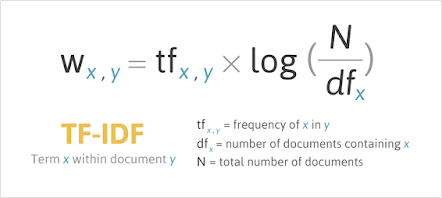 <br>
위의 이미지는 y는 문서, x는 단어라고 할 때 TF-IDF의 수식을 보여준다. TF는 앞서 설명했듯이 각 문서에 등장하는 단어의 빈도를 의미하므로 DTM을 만들면 자연스럽게 해결됨.


IDF를 구하기 위해서는 우선 문서 빈도 DF와 전체 문서의 수 N을 이해해야 합니다 <br>


### 4-7 단어 빈도를 이용한 벡터화 (6) TF-IDF 구현하기

In [2]:
from math import log
import pandas as pd
print('=3')

=3


In [3]:
docs = [
    'John likes to watch movies and Mary likes movies too',
    'James likes to watch TV',
    'Mary also likes to watch football games',  
]
print('=3')

=3


In [4]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


In [5]:
N = len(docs) # 총 문서의 수
N

3

In [6]:
def tf(t, d):
    return d.count(t)
 
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc    
    return log(N/(df + 1)) + 1
 
def tfidf(t, d):
    return tf(t,d)* idf(t)

In [7]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

James  John  Mary  TV  also  and  football  games  likes  movies  to  too  \
0      0     1     1   0     0    1         0      0      2       2   2    1   
1      1     0     0   1     0    0         0      0      1       0   1    0   
2      0     0     1   0     1    0         1      1      1       0   1    0   

   watch  
0      1  
1      1  
2      1

In [8]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns=["IDF"])
idf_

IDF
James     1.405465
John      1.405465
Mary      1.000000
TV        1.405465
also      1.405465
and       1.405465
football  1.405465
games     1.405465
likes     0.712318
movies    1.405465
to        0.712318
too       1.405465
watch     0.712318

In [9]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

James      John  Mary        TV      also       and  football     games  \
0  0.000000  1.405465   1.0  0.000000  0.000000  1.405465  0.000000  0.000000   
1  1.405465  0.000000   0.0  1.405465  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000   1.0  0.000000  1.405465  0.000000  1.405465  1.405465   

      likes   movies        to       too     watch  
0  1.424636  2.81093  1.424636  1.405465  0.712318  
1  0.712318  0.00000  0.712318  0.000000  0.712318  
2  0.712318  0.00000  0.712318  0.000000  0.712318

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(tfidfv.vocabulary_.keys()) # 단어장을 리스트로 저장
vocab.sort() # 단어장을 알파벳 순으로 정렬

# TF-IDF 행렬에 단어장을 데이터프레임의 열로 지정하여 데이터프레임 생성
tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = vocab)
tfidf_

also       and  football     games     james      john     likes  \
0  0.000000  0.321556  0.000000  0.000000  0.000000  0.321556  0.379832   
1  0.000000  0.000000  0.000000  0.000000  0.572929  0.000000  0.338381   
2  0.464997  0.000000  0.464997  0.464997  0.000000  0.000000  0.274634   

       mary    movies        to       too        tv     watch  
0  0.244551  0.643111  0.189916  0.321556  0.000000  0.189916  
1  0.000000  0.000000  0.338381  0.000000  0.572929  0.338381  
2  0.353642  0.000000  0.274634  0.000000  0.000000  0.274634

### 4-8 LSA와 LDA (1) LSA

DTM과 TF-IDF 행렬같이 Bag of Words를 기반으로 한 표현 방법은 근본적으로 단어의의미를 벡터로 표현하지 못한다는 한계를 가지고 있다. 


####  LSA (Latent Semantic Analysis)
한국어로 잠재의미분석이라고 불리는 <b> LSA(Latent Semantic Analysis)</b>는 전체 코퍼스에서 문서 속 단어들 사이의 관계를 찾아내는 자연어 처리 정보 검색 기술이다. <br>
LSA를 사용하면 <b>단어와 단어 사이, 문서와 문서 사이, 단어와 문서 사이의 의미적 유사성 점수</b>를 찾아낼 수 있다. 그리고 이 방법은 어떤 문서에서 특정 단어들의 빈도가 몇인지를 판단하는 것보다 효과적인 경우가 많다. <br><br>
    
#### 특잇값 분해 

https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-19-%ED%96%89%EB%A0%AC?category=1057680 <br>


특잇값 분해(Singular Value Decomposition, SVD) 란 m × n 크기의 임의의 사각 행렬 A를 위의 그림의 Full SVD와 같이 특이 벡터(singular vector)의 행렬와 특잇값(singular value)의 대각행렬로 분해하는 것을 말합니다. 특잇값 분해를 좀 더 자세히 이해하기 위해서 아래의 글을 도입부부터 '파이썬을 사용한 특이 분해'까지만 읽고 와

Q) 단위 행렬의 정의는 뭔가요? 주대각선의 성분이 모두 1이며 나머지 성분은 모두 0인 정사각행렬을 단위행렬이라고 한다. <br>
Q) n차 정사각행렬 행렬 A에 대해 어떤 행렬을 곱했을 때, 결과 행렬이 단위 행렬이라면 이 어떤 행렬을 A의 무슨 행렬이라고 하나요? A와 어떤 행렬을 곱했을 때 결과가 단위행렬이라면, 이때 어떤 행렬을 A의 역행렬이라고 합니다. <br>
Q) 행렬 A에 특잇값 분해를 수행하면 U, Σ, V라는 세 가지 행렬로 분해됩니다. 이때, 특잇값(singular value)은 어디서 얻을 수 있나요? Σ의 대각 성분 <br>

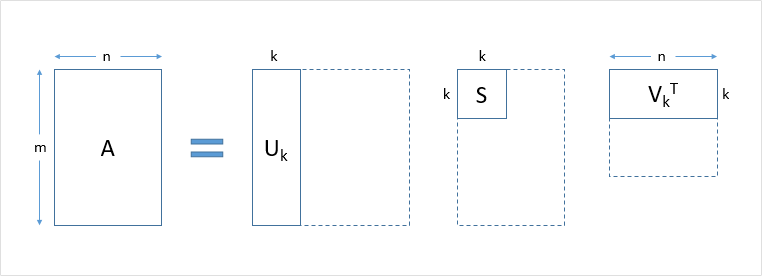
LSA는 DTM이나 TF-IDF 행렬 등에 Truncated SVD를 수행합니다. 이렇게 분해하여 얻은 행렬 3개(, S)는 각각 '문서들과 관련된 의미들을 표현한 행렬', '단어들과 관련된 의미를 표현한 행렬' , '각 의미의 중요도를 표현한 행렬' 이라고 해석할 수 있습니다. <br>
m을 문서의 수, n을 단어의 수라고 하였을 때, Truncated SVD를 통해 얻은 행렬 Uk는 m×k의 크기를 가집니다 <br>

### 4-9 LSA와 LDA (2)LSA 실습

In [11]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
print('=3')

=3


In [12]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /aiffel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
import os

csv_filename = os.getenv('HOME')+'/aiffel/topic_modelling/data/abcnews-date-text.csv'

urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv", 
                           filename=csv_filename)

('/aiffel/aiffel/topic_modelling/data/abcnews-date-text.csv',
 <http.client.HTTPMessage at 0x7f39873435b0>)

In [14]:
data = pd.read_csv(csv_filename, on_bad_lines='skip')
data.shape

(1082168, 2)

In [15]:
data.tail()

publish_date                                      headline_text
1082163      20170630  when is it ok to compliment a womans smile a g...
1082164      20170630                   white house defends trumps tweet
1082165      20170630     winter closes in on tasmania as snow ice falls
1082166      20170630  womens world cup australia wins despite atapat...
1082167      20170630          youtube stunt death foreshadowed by tweet

In [16]:
text = data[['headline_text']].copy()
text.tail()

headline_text
1082163  when is it ok to compliment a womans smile a g...
1082164                   white house defends trumps tweet
1082165     winter closes in on tasmania as snow ice falls
1082166  womens world cup australia wins despite atapat...
1082167          youtube stunt death foreshadowed by tweet

In [17]:
text.nunique() # 중복을 제외하고 유일한 시퀀스를 가지는 샘플의 개수를 출력

headline_text    1054983
dtype: int64

In [18]:
text.drop_duplicates(inplace=True) # 중복 샘플 제거
text.reset_index(drop=True, inplace=True)
text.shape

(1054983, 1)

#### 데이터 정제 및 정규화

In [ ]:
# NLTK 토크나이저를 이용해서 토큰화
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

# 불용어 제거
stop_words = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])

text.head()

In [ ]:
# 단어 정규화. 3인칭 단수 표현 -> 1인칭 변환, 과거형 동사 -> 현재형 동사 등을 수행한다.
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

# 길이가 1 ~ 2인 단어는 제거.
text = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 2])
print(text[:5])

#### 역토큰화 및 DTM 생성

In [ ]:
# 역토큰화 (토큰화 작업을 역으로 수행)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(text[i])
    detokenized_doc.append(t)

train_data = detokenized_doc
print('=3')

In [ ]:
train_data[:5]

In [ ]:
# 상위 5000개의 단어만 사용
c_vectorizer = CountVectorizer(stop_words='english', max_features = 5000)
document_term_matrix = c_vectorizer.fit_transform(train_data)
print('=3')

In [ ]:
print('행렬의 크기 :',document_term_matrix.shape)

#### scikit-learn TruncatedSVD 활용

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_topics = 10
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_model.fit_transform(document_term_matrix)

In [ ]:
print(lsa_model.components_.shape)

In [ ]:
terms = c_vectorizer.get_feature_names_out() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lsa_model.components_, terms)

### 4-10 LSA와 LDA (3)LDA

문서의 집합에서 토픽을 찾아내는 프로세스를 <b>토픽 모델링(Topic Modelling)</b> <br>
<b>잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)</b> 는 문서들이 토픽들의 혼합으로 구성되어 있으며, 토픽들은 확률 분포에 기반하여 단어들을 생성한다고 가정합니다. 그리고 데이터가 주어지면, LDA는 이 가정에 따라 단어들의 분포로부터 문서가 생성되는 과정을 역추적해 문서의 토픽을 찾아냅니다. <br>

#### LDA(Latent Dirichlet Allocation) 시뮬레이션

https://lettier.com/projects/lda-topic-modeling/ <br>

1. '+ Add Document'를 통해 다수의 단어로 구성된 다수의 문서를 추가하세요.
2. 좌측의 'Topics'의 값을 원하는 값으로 지정해보세요. 이 값은 이 코퍼스에서 몇 개의 주제를 얻을 것인지 정하는 하이퍼파라미터값입니다.
3. 'Run LDA'를 누르고 결과로 나오는 두 개의 행렬을 확인합니다.

#### LDA(Latent Dirichlet Allocation)의 두가지 결과
https://wikidocs.net/30708 


### 4-11 LSA와 LDA (4) LDA 실습
#### TF-IDF 행렬 생성

In [ ]:
# 상위 5,000개의 단어만 사용
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_data)

# TF-IDF 행렬의 크기를 확인해봅시다.
print('행렬의 크기 :', tf_idf_matrix.shape)

#### scikit-learn LDA Model활용

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
lda_model.fit_transform(tf_idf_matrix)

In [ ]:
print(lda_model.components_.shape)

In [ ]:
# LDA의 결과 토픽과 각 단어의 비중을 출력합시다.
terms = tfidf_vectorizer.get_feature_names_out()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n-1:-1]])

get_topics(lda_model.components_, terms)

### 4-12 텍스트 분포를 이용한 비지도 학습 토크나이저 (1) 형태소 분석기와 단어 미등록 문제

#### 형태소 분석기의 필요성

한국어 교착어란 하나의 낱말(엄밀히는 하나의 어절)이 하나의 어근(root)(혹은 어간(stem))과 각각 단일한 기능을 가지는 하나 이상의 접사(affix)의 결합으로 이루어져 있는 언어를 말한다. 조사라는 품사는 교착어에만 존재한다. <br>

이런 특성으로 인해 한국어는 영어와 달리 조사나 접사가 존재하며, 영어처럼 띄어쓰기 단위 토큰화가 제대로 동작하지 않습니다. <br>


In [ ]:
en_text = "The dog ran back to the corner near the spare bedrooms"
print(en_text.split())

In [ ]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사 왔어"
print(kor_text.split())

In [ ]:
from konlpy.tag import Okt

tokenizer = Okt()
print(tokenizer.morphs(kor_text))

#### 단어 미등록 문제

In [ ]:
print(tokenizer.morphs('모두의연구소에서 자연어 처리를 공부하는 건 정말 즐거워'))

### 4-13 텍스트 분포를 이용한 비지도 학습 토크나이저 (2) soynlp

soynlp는 품사 태깅, 형태소 분석 등을 지원하는 한국어 형태소 분석기입니다.
비지도 학습으로 형태소 분석을 한다는 특징을 갖고 있으며, 데이터에 자주 등장하는 단어들을 형태소로 분석합니다.
soynlp 형태소 분석기는 내부적으로 단어 점수표로 동작합니다. 이 점수는 응집 확률(cohesion probability) 과 브랜칭 엔트로피(branching entropy) 를 활용합니다.

In [ ]:
import urllib.request

txt_filename = os.getenv('HOME')+'/aiffel/topic_modelling/data/2016-10-20.txt'

urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt",\
                            filename=txt_filename)

In [ ]:
from soynlp import DoublespaceLineCorpus

# 말뭉치에 대해서 다수의 문서로 분리
corpus = DoublespaceLineCorpus(txt_filename)
len(corpus)

In [ ]:
i = 0
for document in corpus:
    if len(document) > 0:
        print(document)
        i = i+1
    if i == 3:
        break

In [ ]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

#### soynlp의 응집확률 (cohesion probability)

응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도이다. 응집 확률은 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서, 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그다음 문자가 나올 확률을 계산하여 누적 곱을 한 값이다. 이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높다. 수식은 아래와 같다.



In [ ]:
word_score_table["반포한"].cohesion_forward

In [ ]:
word_score_table["반포한강"].cohesion_forward

In [ ]:
word_score_table["반포한강공"].cohesion_forward

In [ ]:
word_score_table["반포한강공원"].cohesion_forward

# 응집확률이 최대화 되는 내부 문자열 구간은 '반포한강공원'이다.

In [ ]:
word_score_table["반포한강공원에"].cohesion_forward

#### soynlp의 브랜칭 엔트로피(brancing entropy)

브랜칭 엔트로피(Brancingh Entropy)는 확률 분포의 엔트로피값을 사용한다. 이는 주어진 문자열에서 다음 문자가 등장할 수 있는 가능성을 판단하는 척도이다. <br>

브랜칭 엔트로피를 주어진 문자 시퀀스에서 다음 문자 예측을 위해 헷갈리는 정도라고 비유해보자, 브랜칭 엔트로피의 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 정확히 예측할 수 있게 되므로 점차 줄어든다. <br>

In [ ]:
word_score_table["디스"].right_branching_entropy

In [ ]:
word_score_table["디스플"].right_branching_entropy

In [ ]:
word_score_table["디스플레"].right_branching_entropy

In [ ]:
word_score_table["디스플레이"].right_branching_entropy

#### soynlp의 LTokenizer
 
띄어쓰기 단위로 잘 나뉜 문장은 L토크나이저(LTokenizer)를 사용하면 좋다. 

In [ ]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

#### 최대 점수 토크나이저

띄어쓰기가 되어 있지 않은 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저

In [ ]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

### 4-14 마무리하며

BoW는 문서를 단어들의 집합으로 취급하여 벡터화하고 DTM은 문서를 단어의 출현 빈도를 나타내는 행렬로 변환합니다.
TF-IDF는 DTM에서 각 단어의 중요도를 계산하는 가중치입니다.

LSA는 DTM에서의 잠재적 의미를 추출하여 문서의 토픽 모델링을 수행합니다.
LDA는 문서들이 각각 다른 토픽들의 혼합으로 이루어져 있다는 가정 하에 토픽 모델링을 수행합니다.

Q) DTM (Document-Term Matrix)은 문서-단어 행렬을 의미합니다. 각 문서에서 사용된 단어의 빈도를 표시하며, 행은 문서를 나타내고 열은 단어를 나타냅니다. 텍스트 데이터의 각 문서를 벡터로 표현할 수 있으며, 이를 활용해 문서 간 유사도를 계산하거나 토픽 모델링 등의 분석을 수행할 수 있습니다.

TF-IDF (Term Frequency-Inverse Document Frequency)는 DTM에서 특정 단어가 얼마나 중요한지를 나타내는 지표입니다. 많이 나오는 일반적인 단어들은 중요하지 않은 단어로 간주되고, 문서를 잘 나타내는 중요한 단어들이 높은 점수를 받게 됩니다.

LSA (Latent Semantic Analysis)는 DTM을 활용해 문서 간 유사도를 계산하는 방법 중 하나입니다.
단어-문서 행렬에서 잠재적인 의미를 추출하여 문서를 벡터 공간 상에 표현합니다. 이를 통해 문서 간 유사도를 계산할 수 있습니다.

LDA (Latent Dirichlet Allocation)는 문서 내의 토픽 분포와 토픽 내 단어 분포를 추정하여 토픽 모델링을 수행하는 방법입니다. 각 문서는 여러 개의 토픽으로 구성되어 있으며, 각 토픽은 단어들의 확률 분포로 나타내어집니다. 이를 통해 각 문서가 어떤 주제를 다루는지를 파악할 수 있습니다.

Q) soynlp는 한국어 자연어 처리를 위한 파이썬 라이브러리입니다.
특히, 자주 등장하는 신조어나 오탈자, 그리고 형태소 분석에서 발생하는 OOV(Out-of-Vocabulary) 문제를 처리하는 데 강점을 가지고 있습니다. 데이터에서 단어 빈도수를 기반으로 단어들을 자동으로 추출하며, 이를 활용해 형태소 분석을 수행합니다.